# Digital Image Processing - Assignment 4

**Student Name:** T.Sri Vishnuvarun

## Task 1: Image Segmentation Using Thresholding (20 Marks)

### (a) Implement Thresholding Methods (10 Marks)

**Objective:** Load a grayscale image and apply Binary Thresholding, Adaptive Thresholding, and Otsu’s Thresholding to segment the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_thresholding(image_path):
    # Load the grayscale image
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Binary Thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Adaptive Thresholding
    adaptive = cv2.adaptiveThreshold(gray, 255, 
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, 11, 2)
    
    # Otsu’s Thresholding
    _, otsu = cv2.threshold(gray, 0, 255, 
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return gray, binary, adaptive, otsu




### (b) Display Original and Segmented Images (5 Marks)

**Objective:** Display the original and segmented images side by side with clear labels.

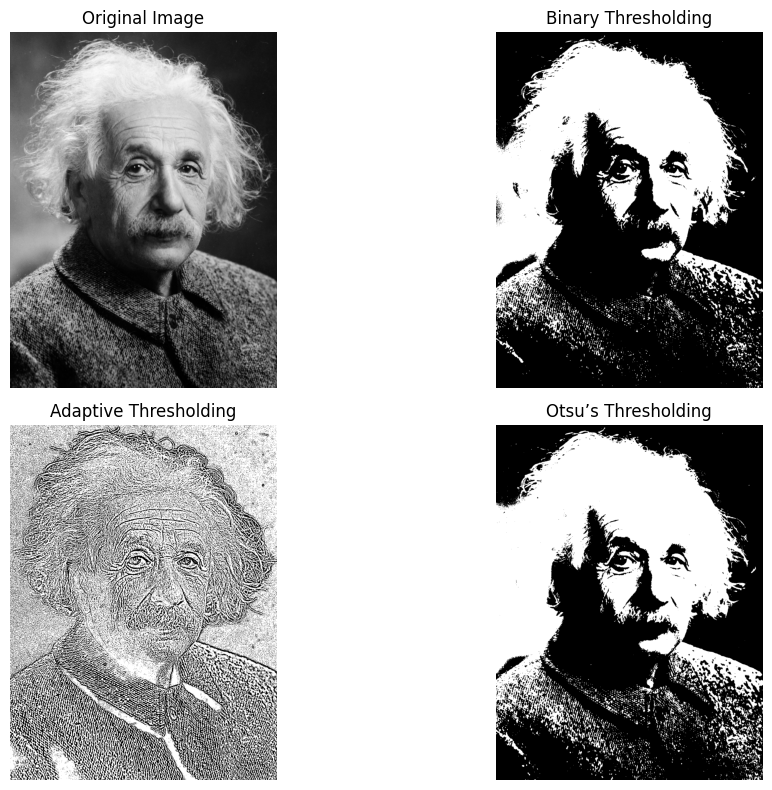

In [2]:
# main.py (continued)

def display_thresholding_results(original, binary, adaptive, otsu):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Thresholding')
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    plt.imshow(adaptive, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.imshow(otsu, cmap='gray')
    plt.title('Otsu’s Thresholding')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('output/thresholding_results.png')
    plt.show()

if __name__ == "__main__":
    original, binary, adaptive, otsu = apply_thresholding('images/input.jpeg')
    display_thresholding_results(original, binary, adaptive, otsu)


# (c) Discussion on Best Segmentation Method (5 Marks)



**Best Method:** Otsu’s Thresholding provided the best segmentation for the image.
**Reason:**
- **Clarity of Object Boundaries:** Otsu’s method automatically determines the optimal threshold value by maximizing the variance between the foreground and background, resulting in clear separation.
- **Noise Levels:** It effectively reduces the impact of noise by considering the entire image histogram, making it more robust compared to simple binary thresholding.
---



## Task 2: Line Detection Using Hough Transform (20 Marks)

### (a) Detect and Highlight Straight Lines (10 Marks)

**Objective:** Implement a function to detect and highlight straight lines using the Hough Line Transform, preceded by Canny edge detection.

#### Code Implementation:

In [18]:


# main.py (continued)

def detect_lines(image_path, canny_threshold1=50, canny_threshold2=150, 
                hough_threshold=100, min_line_length=100, max_line_gap=10):
    # Load the image in color
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Canny Edge Detection
    edges = cv2.Canny(gray, canny_threshold1, canny_threshold2)
    
    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, hough_threshold, 
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    # Draw lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Save the processed image
    # cv2.imwrite(output_path, img)
    
    return edges, img






### (b) Test Function on an Image with Straight Lines (5 Marks)

**Objective:** Apply the `detect_lines` function to an image with clear straight lines and display the original and processed images.

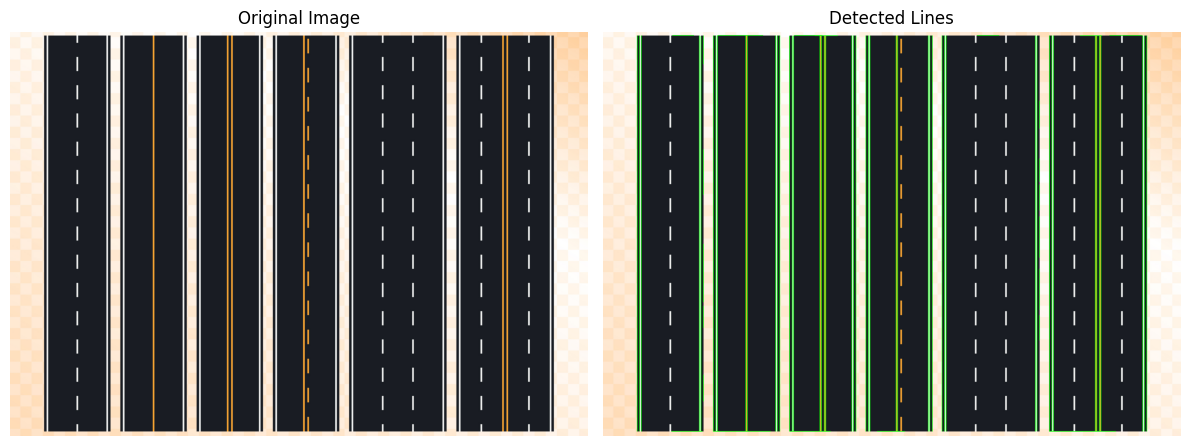

In [24]:
# main.py (continued)

def display_line_detection(original_path, processed):
    original = cv2.imread(original_path)
    processed = processed
    
    # Convert BGR to RGB for displaying with matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_rgb)
    plt.title('Detected Lines')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    edges, processed = detect_lines('images/road-side-1.jpg')
    display_line_detection('images/road-side-1.jpg', processed)

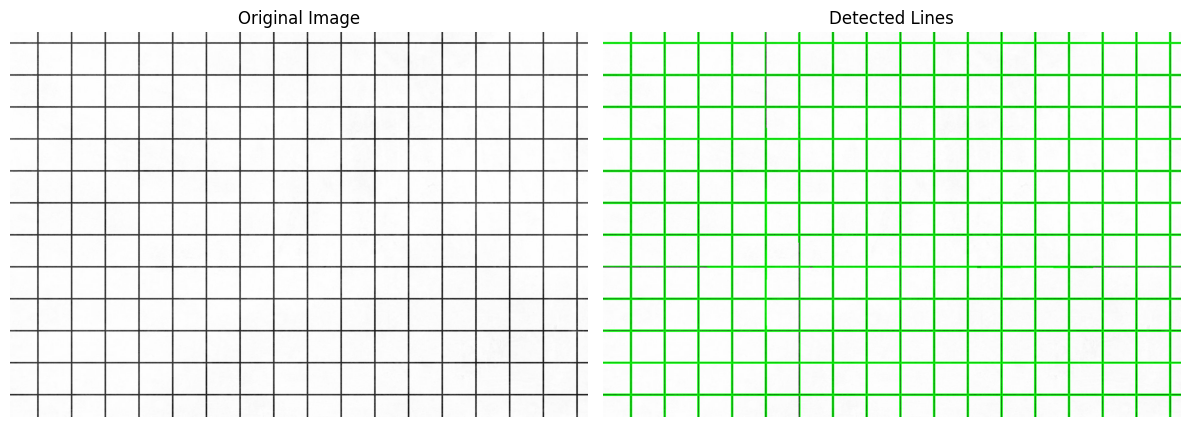

In [19]:
# main.py (continued)

def display_line_detection(original_path, processed):
    original = cv2.imread(original_path)
    processed = processed
    
    # Convert BGR to RGB for displaying with matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_rgb)
    plt.title('Detected Lines')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    edges, processed = detect_lines('images/grid.jpg')
    display_line_detection('images/grid.jpg', processed)



### (c) Experiment with Different Threshold Parameters (5 Marks)



In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_and_detect(image_path, 
                     canny_threshold1=50, canny_threshold2=150, 
                     hough_threshold=100, min_line_length=100, max_line_gap=10):
    """
    Adjust Hough Transform parameters, detect lines, and display results.
    
    Parameters:
    - image_path (str): Path to the input image.
    - output_path (str): Path to save the processed image.
    - canny_threshold1 (int): First threshold for the hysteresis procedure in Canny.
    - canny_threshold2 (int): Second threshold for the hysteresis procedure in Canny.
    - hough_threshold (int): Accumulator threshold parameter for HoughLinesP.
    - min_line_length (int): Minimum length of line to be detected.
    - max_line_gap (int): Maximum allowed gap between points on the same line.
    """
    # Detect lines using the existing function
    edges, processed_img = detect_lines(image_path, 
                                        canny_threshold1, canny_threshold2, 
                                        hough_threshold, min_line_length, max_line_gap)
    
    # Load the original image for comparison
    original_img = cv2.imread(image_path)
    original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)
    
    # Display the original and processed images side by side
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_rgb)
    plt.title(f'Detected Lines\nThreshold: {hough_threshold}, Min Length: {min_line_length}, Max Gap: {max_line_gap}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

 Step 2: Experiment with Different hough_threshold ValuesThe hough_threshold parameter determines the minimum number of intersections in the Hough accumulator to detect a line. Increasing this value makes the detection stricter, resulting in fewer detected lines but with higher confidence.

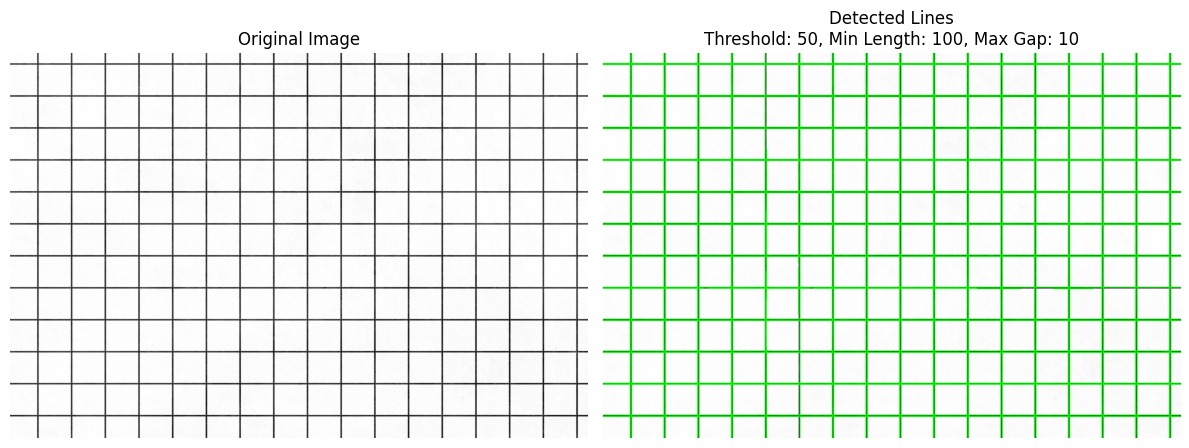

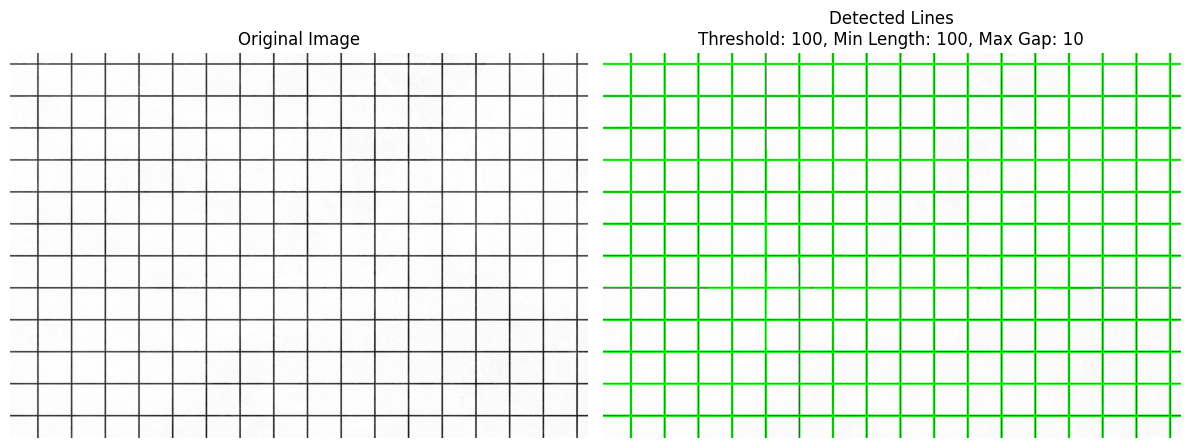

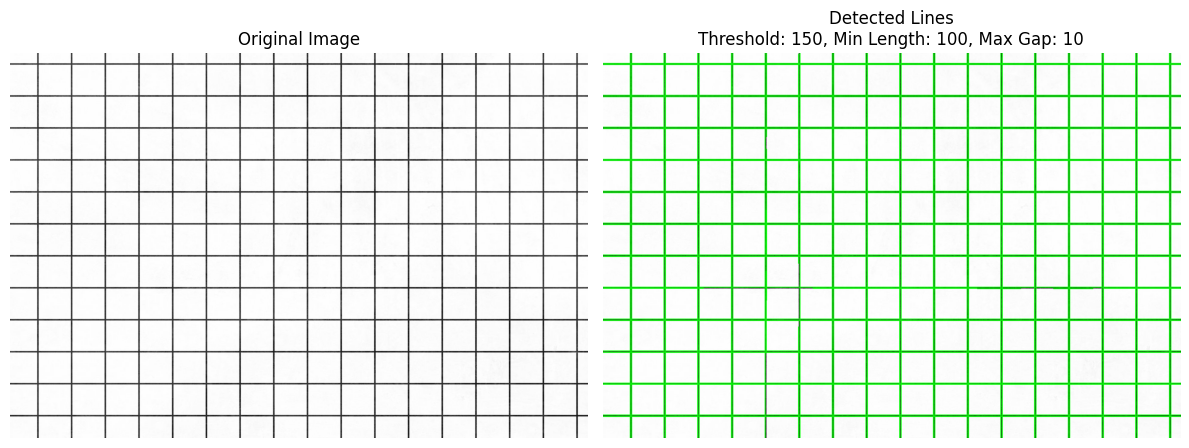

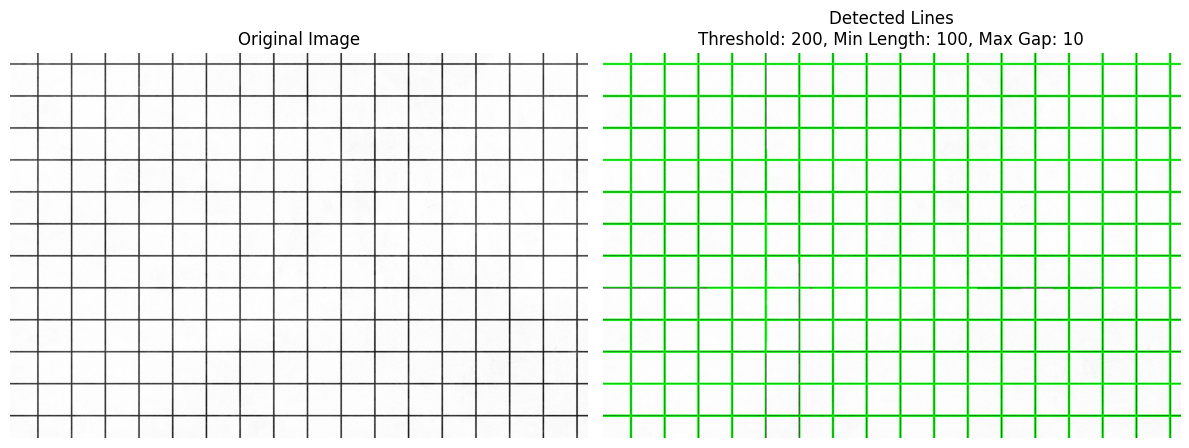

In [21]:
# Experiment with varying hough_threshold values
threshold_values = [50, 100, 150, 200]

for thresh in threshold_values:
    output = f'images/road_lines_threshold_{thresh}.jpg'
    adjust_and_detect('images/grid.jpg', 
                     hough_threshold=thresh)

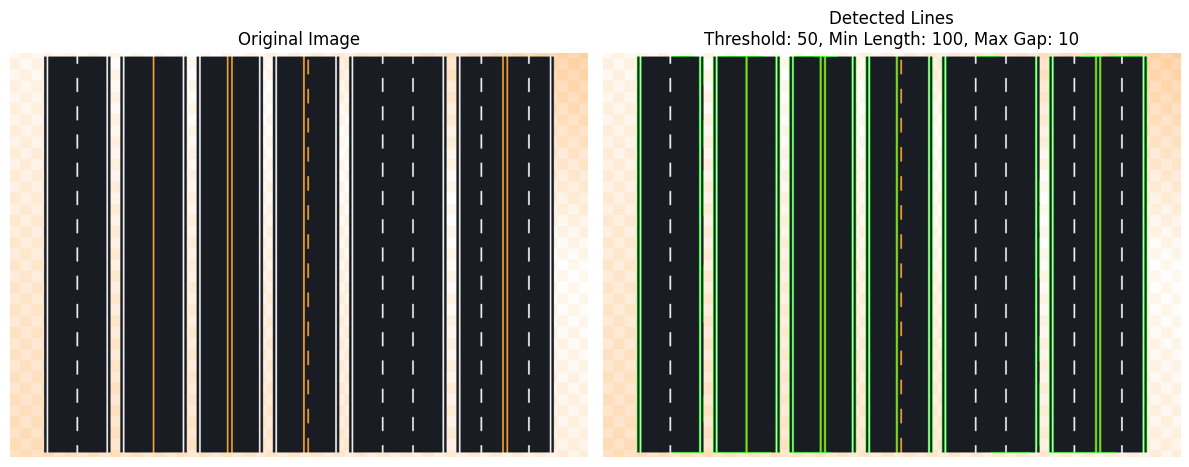

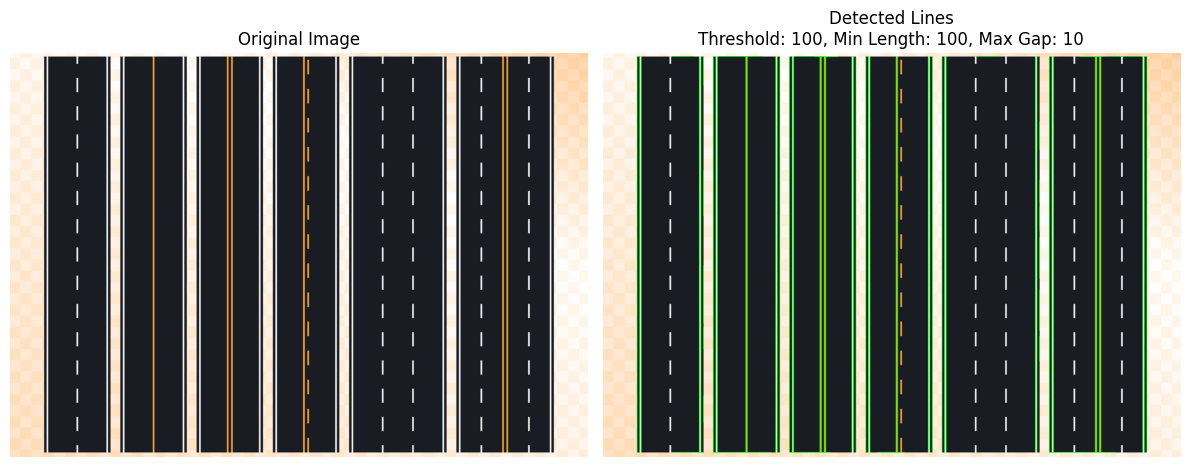

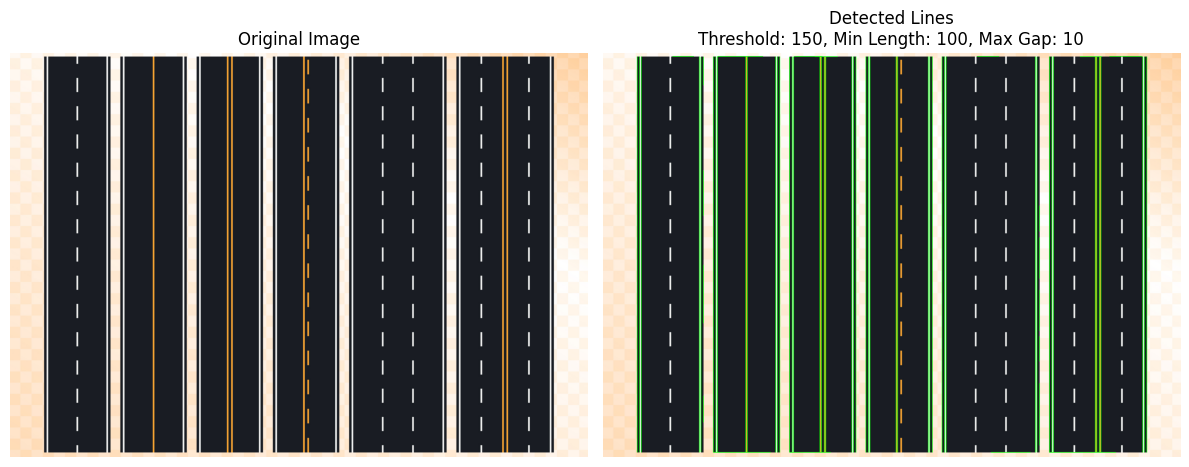

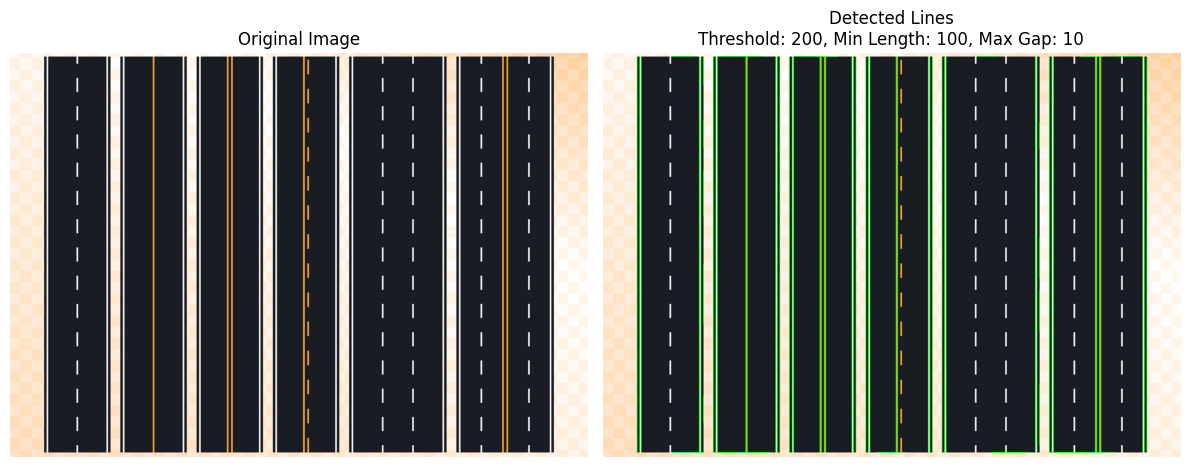

In [28]:
# Experiment with varying hough_threshold values
threshold_values = [50, 100, 150, 200]

for thresh in threshold_values:
    output = f'images/road_lines_threshold_{thresh}.jpg'
    adjust_and_detect('images/road-side-1.jpg', 
                     hough_threshold=thresh)

**Observations:**
- **Low Threshold (50):** More lines are detected, including weaker and potentially irrelevant lines.
- **Medium Threshold (100):** A balanced number of lines are detected, capturing the main structures without excessive noise.
- **High Threshold (150 & 200):** Fewer lines are detected, focusing only on the most prominent and confident lines.
### Step 3: Adjust min_line_length and max_line_gapThe min_line_length parameter specifies the minimum length of a line to be detected, while max_line_gap defines the maximum allowed gap between points on the same line to link them

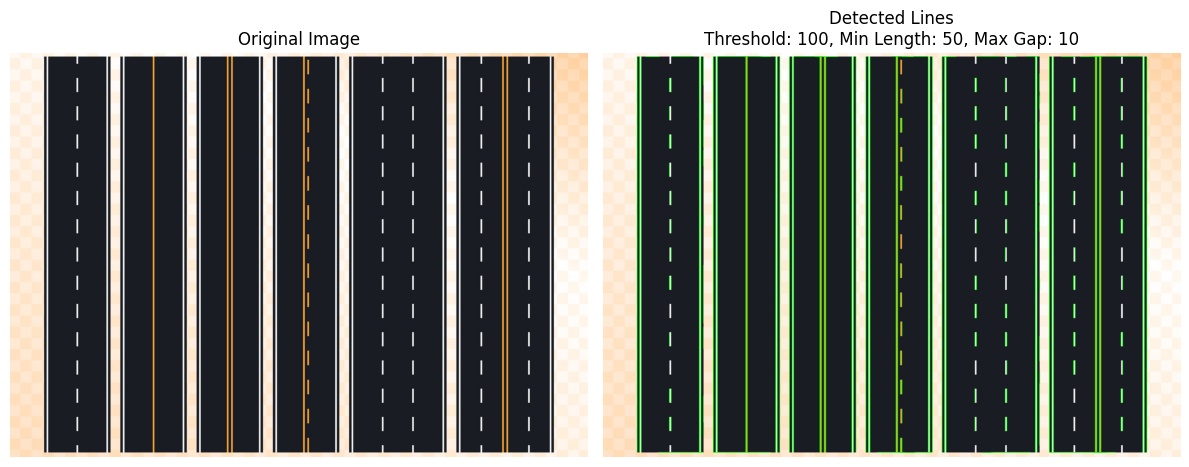

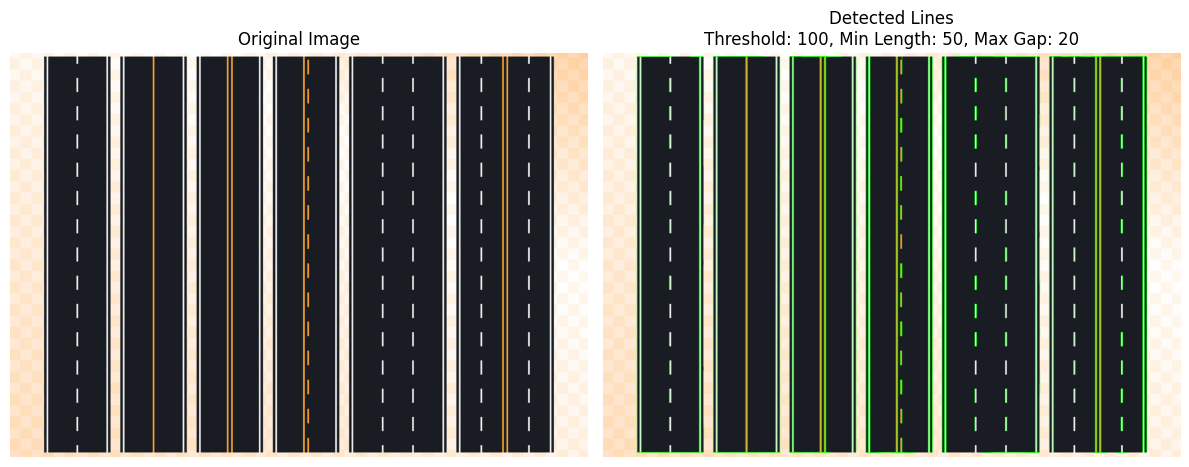

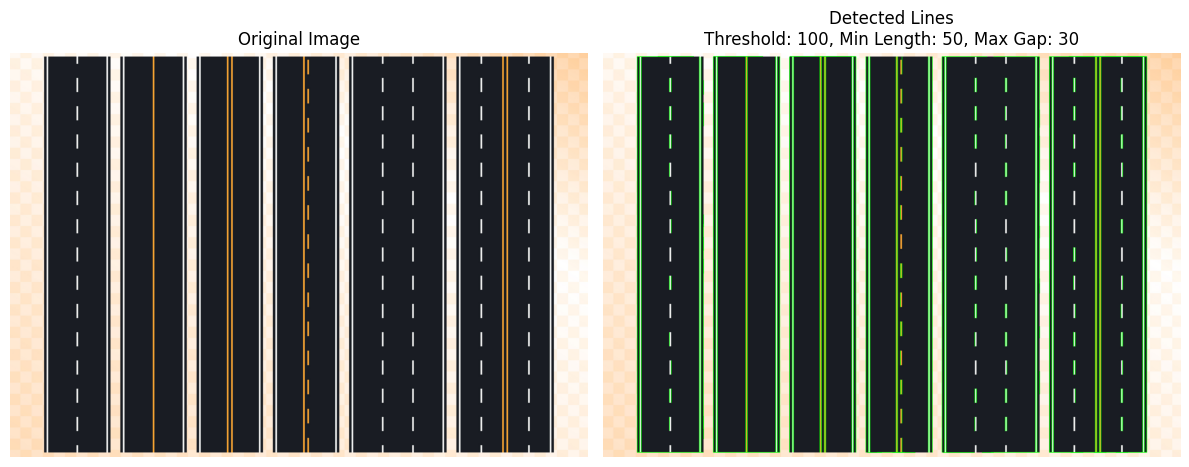

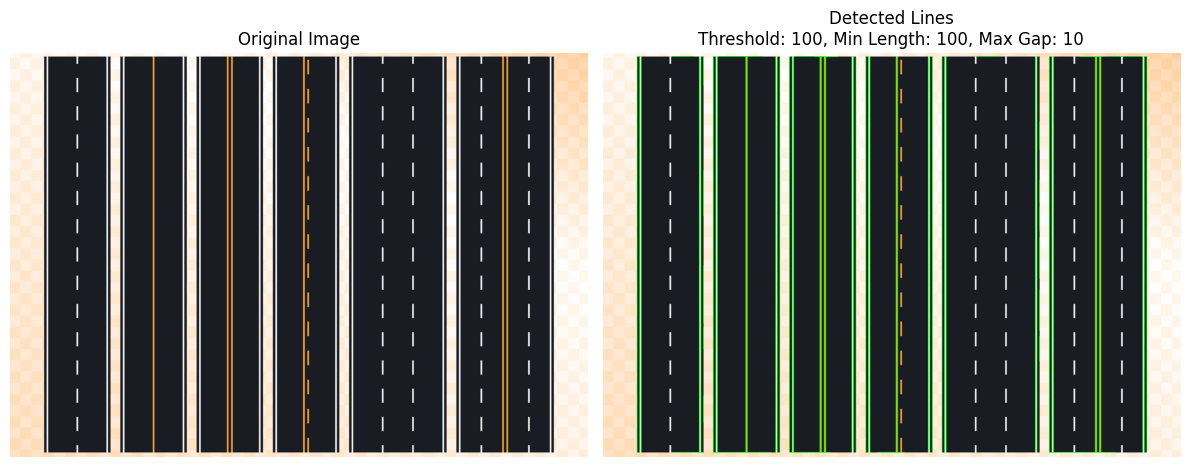

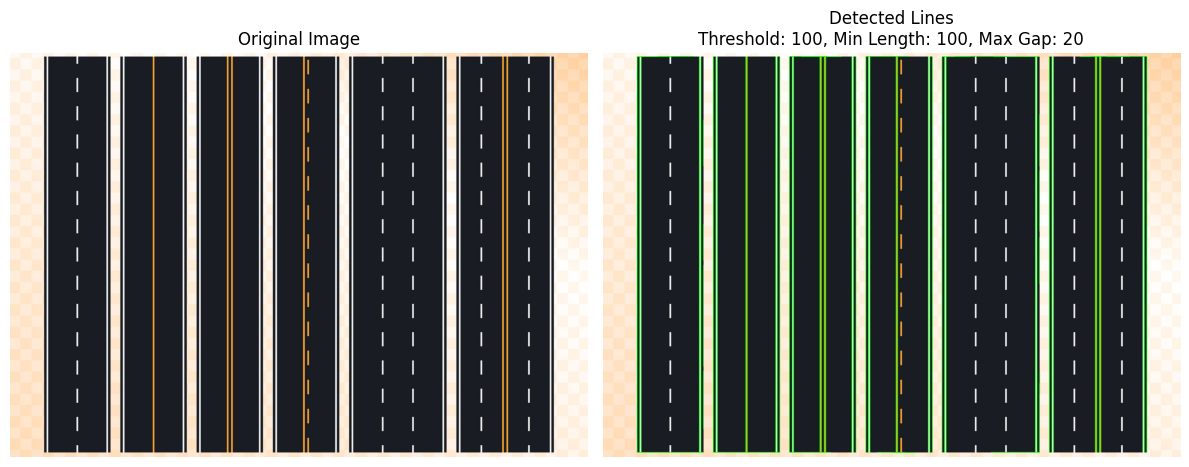

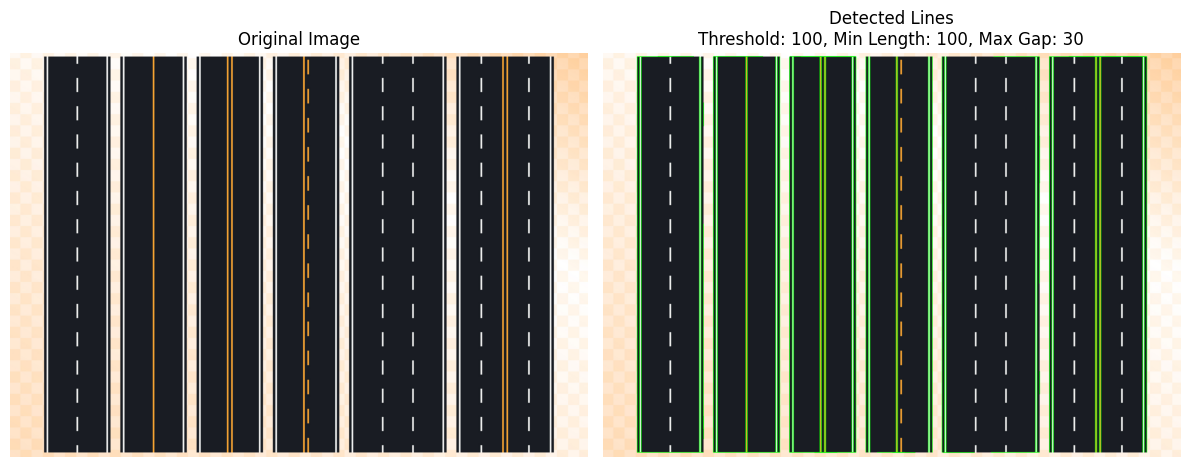

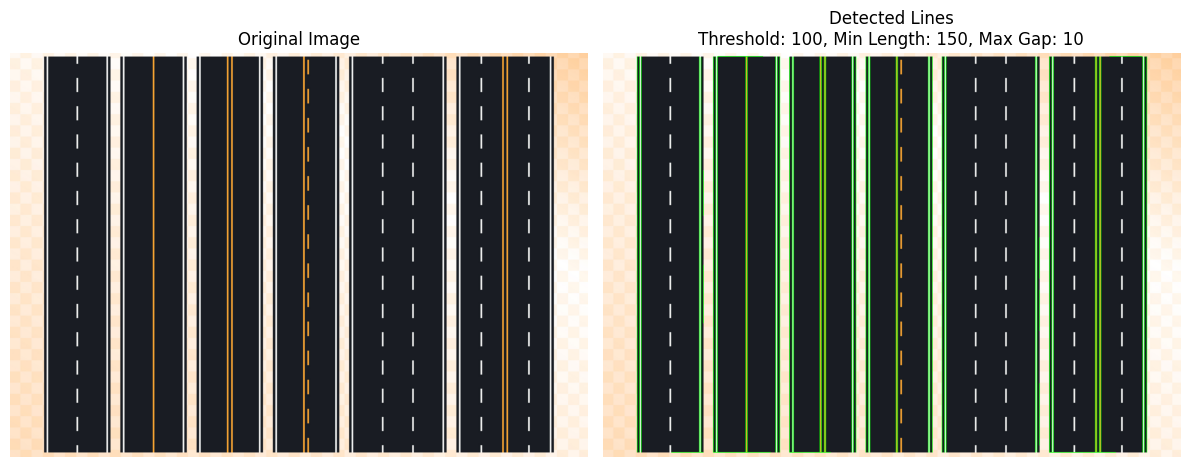

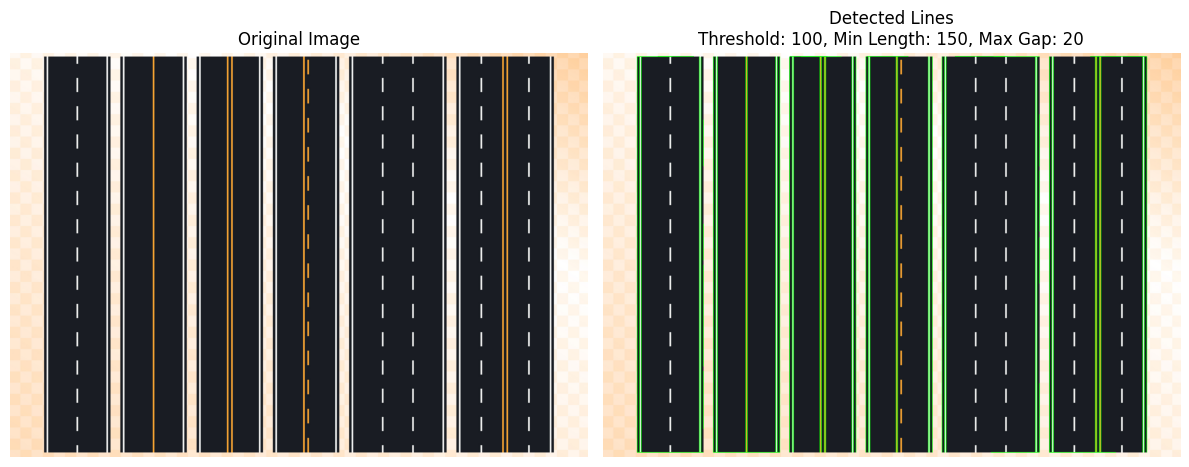

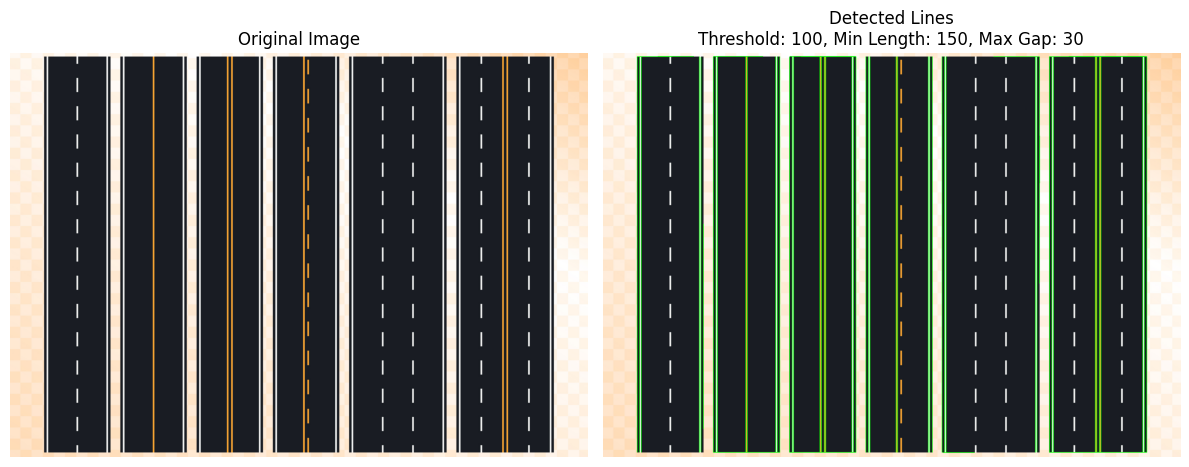

In [30]:
# Experiment with varying min_line_length and max_line_gap values
line_length_values = [50, 100, 150]
line_gap_values = [10, 20, 30]

for min_len in line_length_values:
    for max_gap in line_gap_values:
        # output = f'images/road_lines_length_{min_len}_gap_{max_gap}.jpg'
        adjust_and_detect('images/road-side-1.jpg', 
                         min_line_length=min_len, max_line_gap=max_gap)

**Observations:**
- **Low min_line_length (50):** Shorter lines are detected, which may include fragmented segments but also increases the number of irrelevant lines.
- **High min_line_length (150):** Only longer lines are detected, reducing noise but potentially missing shorter yet significant lines.
- **Low max_line_gap (10):** Lines must be continuous with minimal gaps, ensuring precise detections but possibly breaking lines that have slight discontinuities.
- **High max_line_gap (30):** Allows for larger gaps between line segments to be connected, which can help in detecting lines that are not perfectly continuous but may also bridge unrelated segments.
## Step 4: Combined Parameter Adjustments for Optimization
Combining optimal values for multiple parameters can yield the best results. For instance, using a higher hough_threshold with appropriate min_line_length and max_line_gap can enhance line detection precision.



1. **Parameter Variations:**
   - **Threshold:** Change the minimum number of intersections in Hough space.

   - **Min Line Length:** Adjust the minimum length of line segments to detect longer lines.

   - **Max Line Gap:** Modify the maximum allowed gap between points to link lines.

   - **Higher Threshold:** Results in fewer detected lines, reducing false positives.

2. **Effects Observed:**

   - **Higher Threshold:** Results in fewer detected lines, reducing false positives.

   - **Longer Min Line Length:** Detects only the more prominent lines.

   - **Smaller Max Line Gap:** Ensures continuous lines without bridging gaps.


By increasing the `hough_threshold`, the algorithm becomes stricter, detecting only the most prominent lines and reducing noise. Increasing `min_line_length` ensures that only significant lines are detected, while decreasing `max_line_gap` prevents the algorithm from connecting disjointed segments falsely.


## Task 3: Circle Detection Using Hough Circle Transform (20 Marks)

### (a) Detect and Highlight Circles (10 Marks)

**Objective:** Implement a function to detect and highlight circles using the Hough Circle Transform, preceded by Gaussian blurring.


In [29]:

def detect_circles(image_path, dp=1.2, min_dist=100, 
                  param1=50, param2=30, min_radius=10, max_radius=100):
    """
    Detect circles in an image using Hough Circle Transform.
    Returns the blurred image and processed image with detected circles.
    """
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, min_dist,
                             param1=param1, param2=param2, 
                             minRadius=min_radius, maxRadius=max_radius)
    
    # Create a copy of original image for drawing
    result = img.copy()
    
    # Draw circles if found
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
    
    return result  # Return only the processed image

In [31]:
def detect_circles(image_path, dp=1.2, min_dist=100, 
                  param1=50, param2=30, min_radius=10, max_radius=100):
    """
    Detect circles in an image using Hough Circle Transform.
    Returns the processed image with detected circles.
    """
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, min_dist,
                             param1=param1, param2=param2, 
                             minRadius=min_radius, maxRadius=max_radius)
    
    # Create a copy of original image for drawing
    result = img.copy()
    
    # Draw circles if found
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
    
    return result  # Return only the processed image


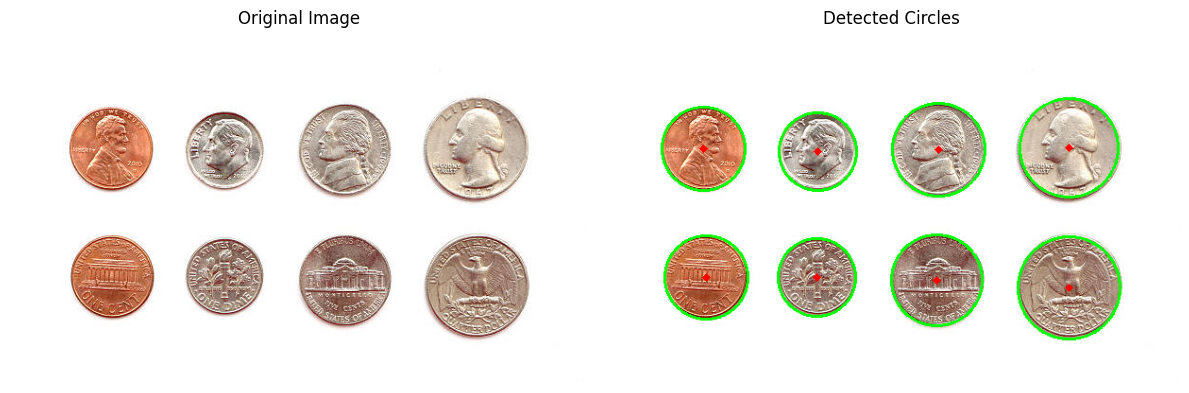

In [33]:
# main.py (continued)

def display_circle_detection(original_path, processed):
    original = cv2.imread(original_path)
    processed = processed
    
    # Convert BGR to RGB for displaying with matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_rgb)
    plt.title('Detected Circles')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    processed = detect_circles('images/coin.jpg')
    display_circle_detection('images/coin.jpg', processed)




### (c) Experiment with Radius Ranges and Accumulator Thresholds (5 Marks)

**Objective:** Adjust `min_radius`, `max_radius`, and `param2` to observe improvements in circle detection.

#### Step-by-Step Solution:

1. **Parameter Adjustments:**
   - **Radius Range:**
     - Narrow the range by setting specific `min_radius` and `max_radius` based on expected circle sizes.
   - **Accumulator Threshold (`param2`):**
     - Lowering `param2` increases sensitivity, detecting more circles (including false positives).
     - Raising `param2` makes detection more stringent, reducing false positives.

2. **Effects Observed:**
   - **Smaller Radius Range:** Improves accuracy by focusing on expected circle sizes.
   - **Adjusted `param2`:** Balances between detecting all relevant circles and minimizing false detections.

3. **Code Adjustments:**
   - Modify the `detect_circles` function parameters and observe outcomes.


1. Running parameter experiments...


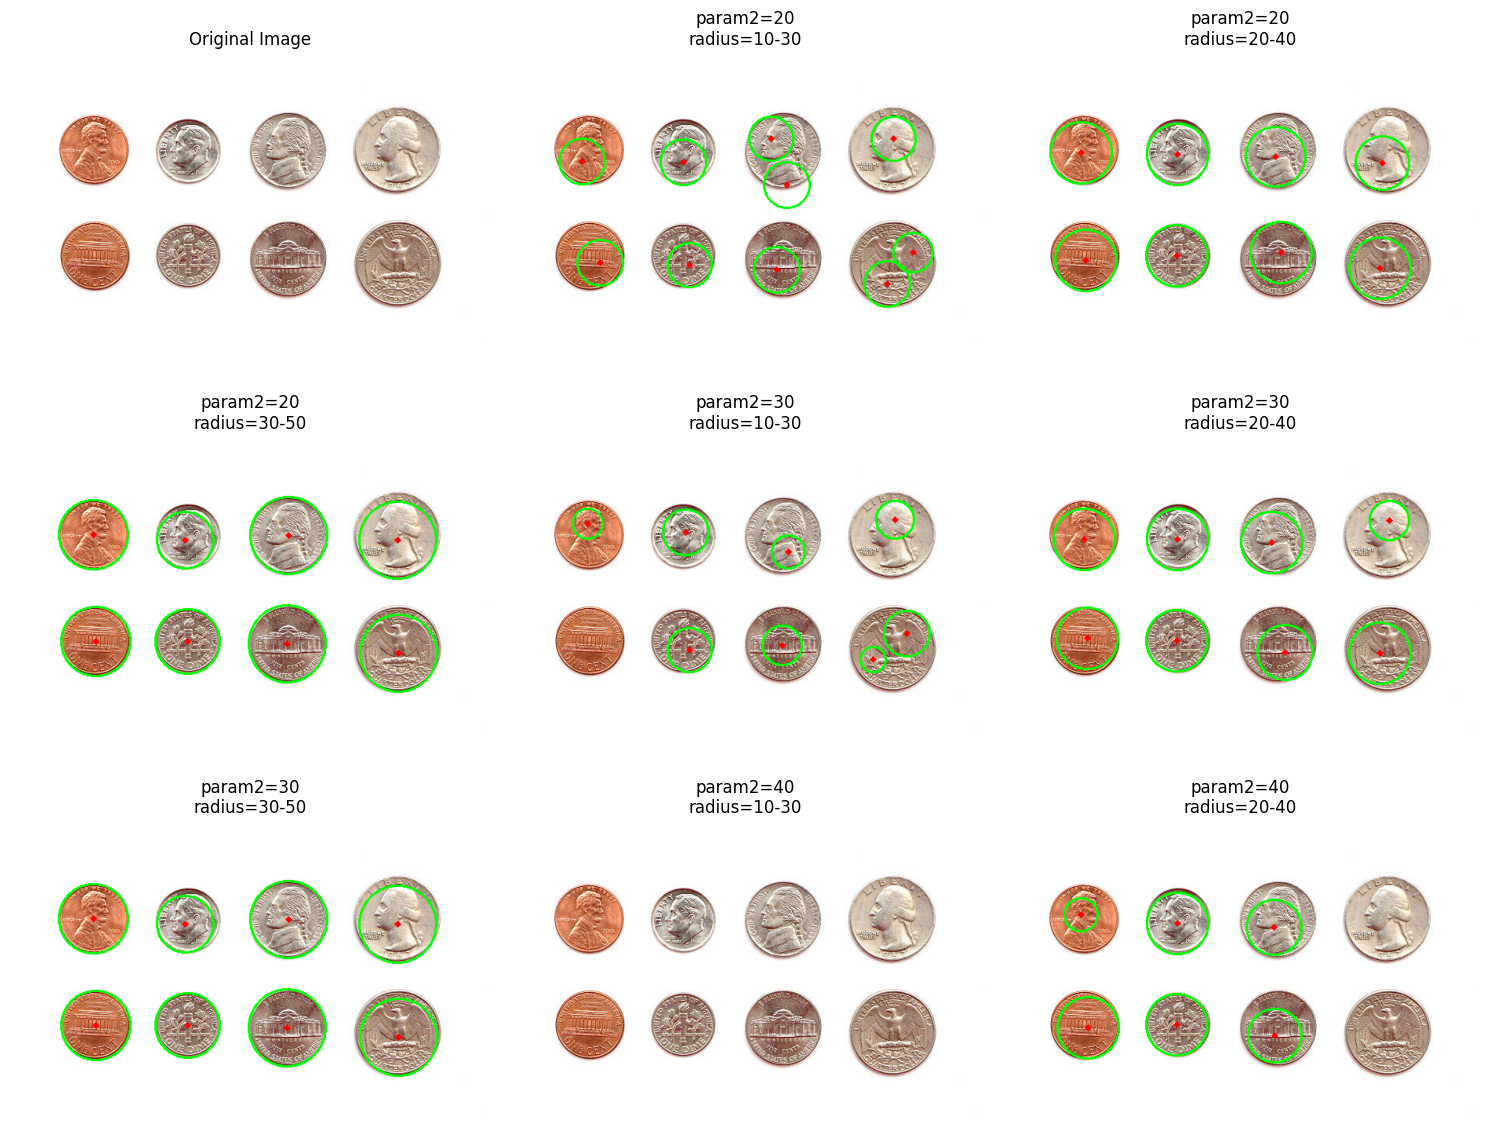


2. Analyzing parameter effects...


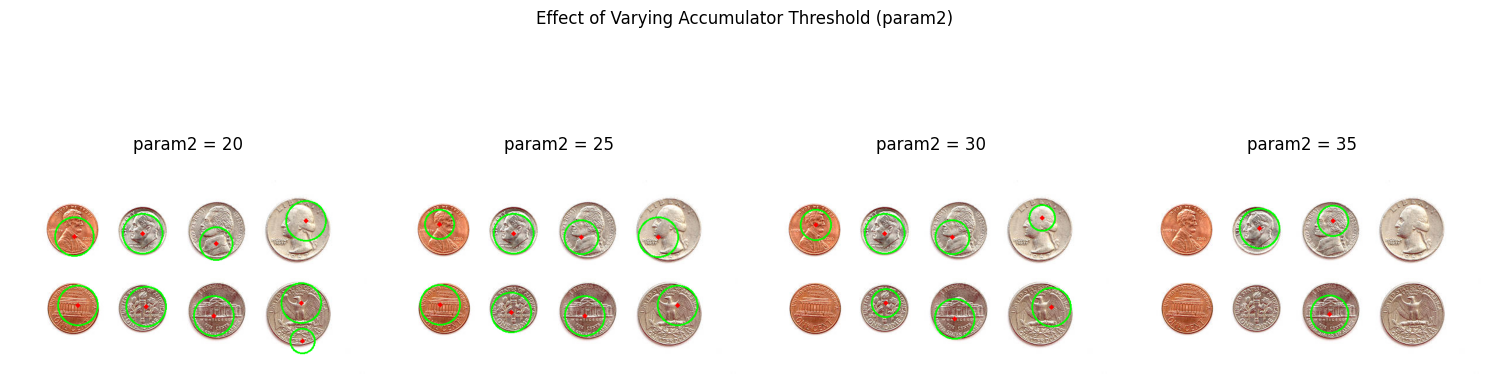

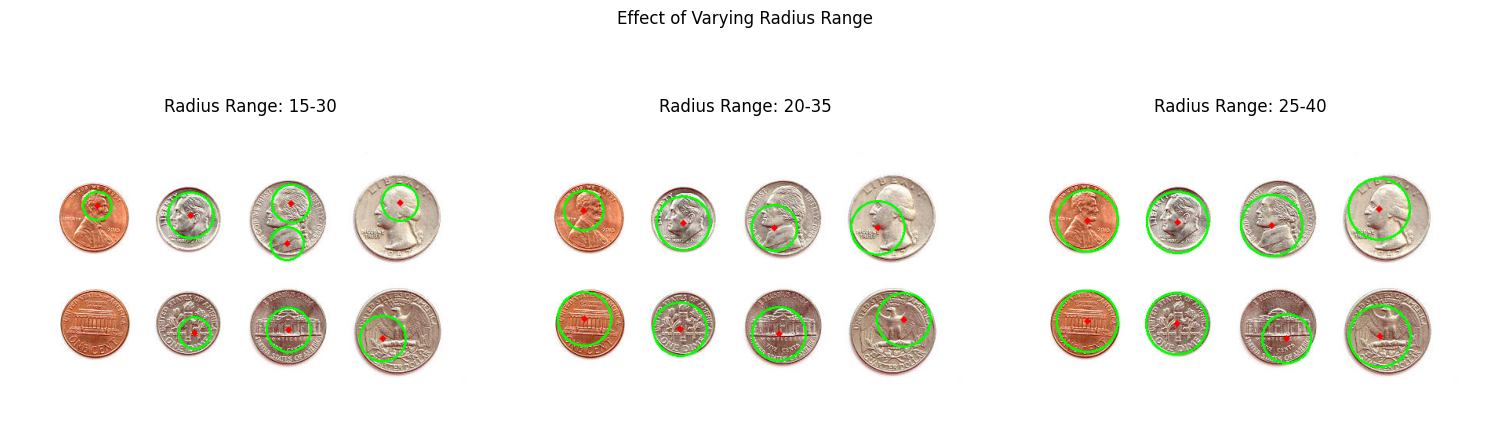


3. Parameter effects summary:
Parameter Effects Summary:

1. Accumulator Threshold (param2):
   - Lower values (20-25): More circles detected, including potential false positives
   - Medium values (25-30): Balance between detection and accuracy
   - Higher values (30-40): Fewer circles detected, more stringent detection

2. Radius Range:
   - Narrow range: Better accuracy for circles of known size
   - Wide range: More flexible detection but increased false positives
   - Optimal range depends on expected circle sizes in the image


In [35]:
def experiment_with_circle_parameters(image_path):
    """
    Experiment with different radius ranges and accumulator thresholds for circle detection.
    Demonstrates the effects of varying parameters on detection accuracy.
    """
    # Define parameter ranges to test
    param2_values = [20, 30, 40]  # Accumulator threshold values
    radius_ranges = [
        (10, 30),   # Small radius range
        (20, 40),   # Medium radius range
        (30, 50)    # Large radius range
    ]
    
    # Create figure for displaying results
    plt.figure(figsize=(15, 12))
    
    # Original image
    original = cv2.imread(image_path)
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Test combinations of parameters
    plot_idx = 2
    for param2 in param2_values:
        for min_r, max_r in radius_ranges:
            if plot_idx <= 9:  # Show up to 8 variations
                processed = detect_circles(
                    image_path,
                    dp=1.2,
                    min_dist=50,
                    param1=50,
                    param2=param2,
                    min_radius=min_r,
                    max_radius=max_r
                )
                
                plt.subplot(3, 3, plot_idx)
                plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
                plt.title(f'param2={param2}\nradius={min_r}-{max_r}')
                plt.axis('off')
                plot_idx += 1
    
    plt.tight_layout()
    plt.show()

def analyze_parameter_effects(image_path):
    """
    Analyze and visualize the effects of varying individual parameters.
    Shows separate analyses for param2 and radius ranges.
    """
    # Test varying param2 (accumulator threshold)
    param2_values = [20, 25, 30, 35]
    plt.figure(figsize=(15, 5))
    
    for idx, param2 in enumerate(param2_values, 1):
        processed = detect_circles(
            image_path,
            dp=1.2,
            min_dist=50,
            param1=50,
            param2=param2,
            min_radius=20,
            max_radius=35
        )
        
        plt.subplot(1, 4, idx)
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
        plt.title(f'param2 = {param2}')
        plt.axis('off')
    
    plt.suptitle('Effect of Varying Accumulator Threshold (param2)')
    plt.tight_layout()
    plt.show()
    
    # Test varying radius ranges
    radius_ranges = [(15, 30), (20, 35), (25, 40)]
    plt.figure(figsize=(15, 5))
    
    for idx, (min_r, max_r) in enumerate(radius_ranges, 1):
        processed = detect_circles(
            image_path,
            dp=1.2,
            min_dist=50,
            param1=50,
            param2=25,
            min_radius=min_r,
            max_radius=max_r
        )
        
        plt.subplot(1, 3, idx)
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
        plt.title(f'Radius Range: {min_r}-{max_r}')
        plt.axis('off')
    
    plt.suptitle('Effect of Varying Radius Range')
    plt.tight_layout()
    plt.show()

# Rest of the code remains the same
def summarize_parameter_effects():
    """
    Print a summary of how different parameters affect circle detection.
    """
    print("Parameter Effects Summary:")
    print("\n1. Accumulator Threshold (param2):")
    print("   - Lower values (20-25): More circles detected, including potential false positives")
    print("   - Medium values (25-30): Balance between detection and accuracy")
    print("   - Higher values (30-40): Fewer circles detected, more stringent detection")
    
    print("\n2. Radius Range:")
    print("   - Narrow range: Better accuracy for circles of known size")
    print("   - Wide range: More flexible detection but increased false positives")
    print("   - Optimal range depends on expected circle sizes in the image")

# Example usage
if __name__ == "__main__":
    input_path = "images/coin.jpg"
    
    print("1. Running parameter experiments...")
    experiment_with_circle_parameters(input_path)
    
    print("\n2. Analyzing parameter effects...")
    analyze_parameter_effects(input_path)
    
    print("\n3. Parameter effects summary:")
    summarize_parameter_effects()


#### Explanation:

By setting a `min_radius` and `max_radius`, the algorithm focuses on circles within a specific size range, enhancing detection accuracy for images with consistent object sizes. Adjusting `param2` helps control the trade-off between detection sensitivity and precision, allowing for optimal circle detection based on image characteristics.

---



## Task 4: Harris Corner Detection (20 Marks)

### (a) Detect and Mark Corners Using Harris Corner Detection (10 Marks)

**Objective:** Implement a function to detect and mark corners using the Harris Corner Detection method.

#### Step-by-Step Solution:

1. **Import Necessary Libraries:**
   - Continue using `cv2`, `numpy`, and `matplotlib`.

2. **Define the Corner Detection Function:**
   - Load the image and convert it to grayscale.
   - Apply Harris Corner Detection using `cv2.cornerHarris()`.
   - Dilate the corner image to mark the corners.
   - Threshold to identify strong corners.
   - Draw circles or markers on the detected corners.



#### Code Implementation:



In [37]:


def detect_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    """
    Detects corners in an image using the Harris Corner Detection algorithm.

    Parameters:
    - image_path (str): Path to the input image.
    - block_size (int): Neighborhood size for corner detection.
    - ksize (int): Aperture parameter for the Sobel operator.
    - k (float): Harris detector free parameter.
    - threshold (float): Threshold for detecting strong corners.

    Returns:
    - dst (ndarray): Result of the Harris Corner Detection.
    - img (ndarray): Image with detected corners marked in red.
    """
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    # Harris Corner Detection
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Dilate to mark the corners
    dst = cv2.dilate(dst, None)
    
    # Threshold for an optimal value, marking the corners
    img[dst > threshold * dst.max()] = [0, 0, 255]
    
    return dst, img



### (b) Apply Function to Image with Distinct Corners (5 Marks)

**Objective:** Apply the `detect_corners` function to an image with distinct corners and display the results.

#### Step-by-Step Solution:

1. **Select an Image:**
   - Use an image like `chessboard.jpg` with prominent corners.

2. **Apply the Function:**
   - Call `detect_corners` with appropriate parameters.

3. **Display Results:**
   - Show the original and processed images side by side.

#### Code Implementation:



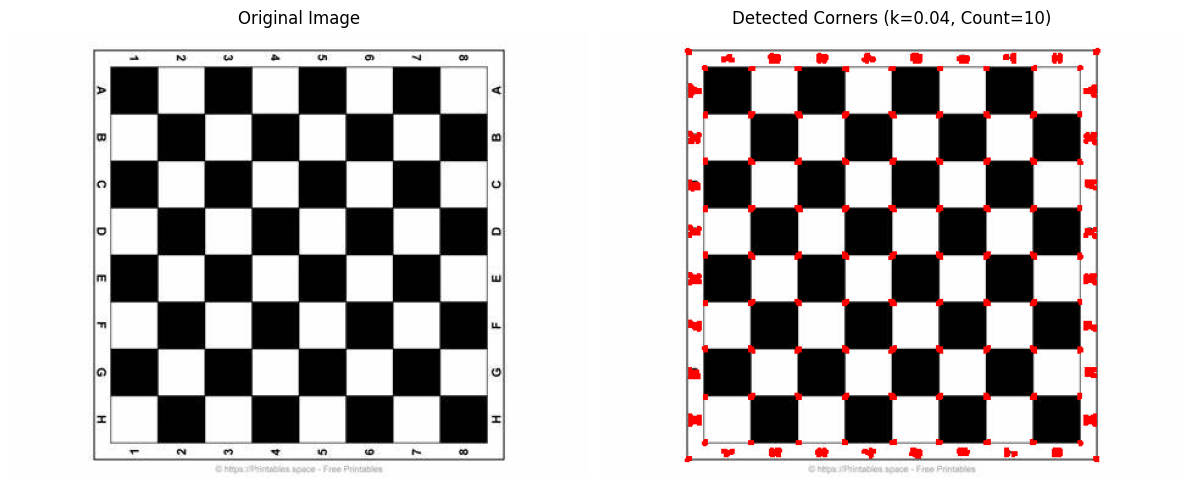

In [38]:

def display_corner_detection(original_path, processed, k_value, detected_corners):
    """
    Displays the original and processed images side by side.

    Parameters:
    - original_path (str): Path to the original image.
    - processed (ndarray): Image with detected corners.
    - k_value (float): Current value of the sensitivity parameter `k`.
    - detected_corners (int): Number of corners detected.
    """
    original = cv2.imread(original_path)
    
    # Convert BGR to RGB for displaying with matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_rgb)
    plt.title(f'Detected Corners (k={k_value}, Count={detected_corners})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def count_corners(dst, threshold):
    """
    Counts the number of corners detected based on the threshold.

    Parameters:
    - dst (ndarray): Result of the Harris Corner Detection.
    - threshold (float): Threshold for detecting strong corners.

    Returns:
    - count (int): Number of corners detected.
    """
    # Create a binary image where corners are marked
    corners = dst > threshold * dst.max()
    
    # Perform connected components to count distinct corners
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(corners.astype(np.uint8))
    
    # Subtract one to ignore the background label
    count = num_labels - 1
    
    return count

if __name__ == "__main__":
    dst, processed = detect_corners('images/chessboard.jpeg')
    display_corner_detection('images/chessboard.jpeg', processed, 0.04, 10)




### (c) Vary Sensitivity Parameter (`k`) and Discuss Findings (5 Marks)

**Objective:** Adjust the sensitivity parameter `k` in the Harris Corner Detection function and observe its impact.

#### Step-by-Step Solution:

1. **Parameter Adjustment:**
   - Vary `k` (commonly between 0.04 to 0.06).

2. **Effects Observed:**
   - **Lower `k`:** More corners detected, including weaker ones, possibly introducing false positives.
   - **Higher `k`:** Fewer but stronger corners detected, enhancing precision but may miss subtle corners.

3. **Code Adjustments:**
   - Change the `k` value and observe the number of detected corners.


Processing with k=0.02...
Number of corners detected: 118


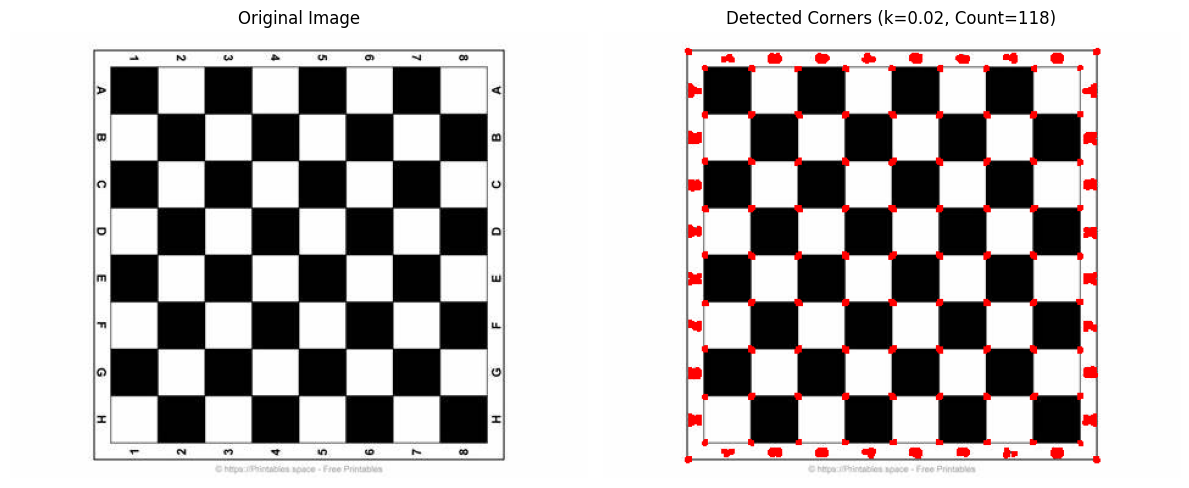

Processing with k=0.04...
Number of corners detected: 119


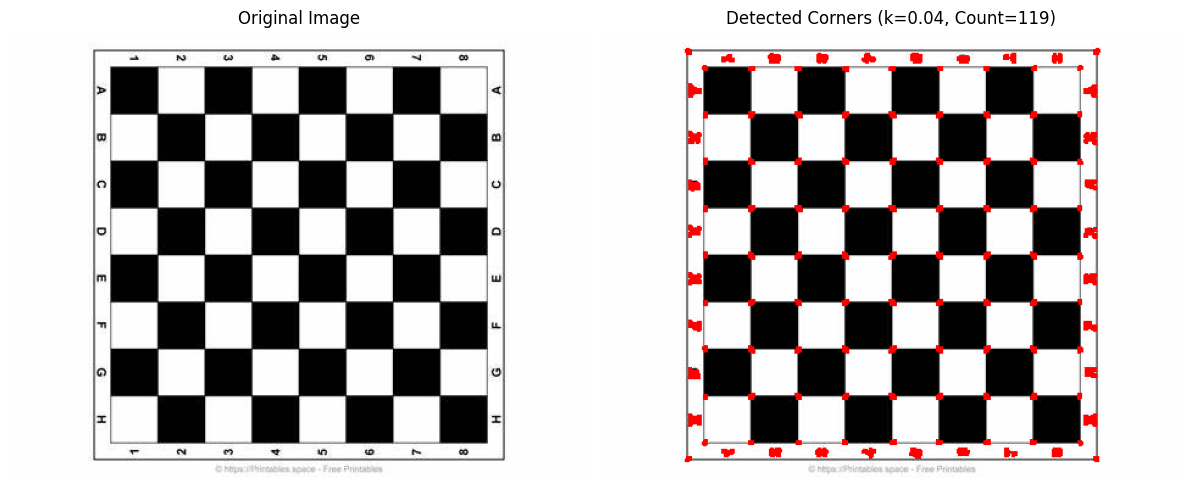

Processing with k=0.06...
Number of corners detected: 119


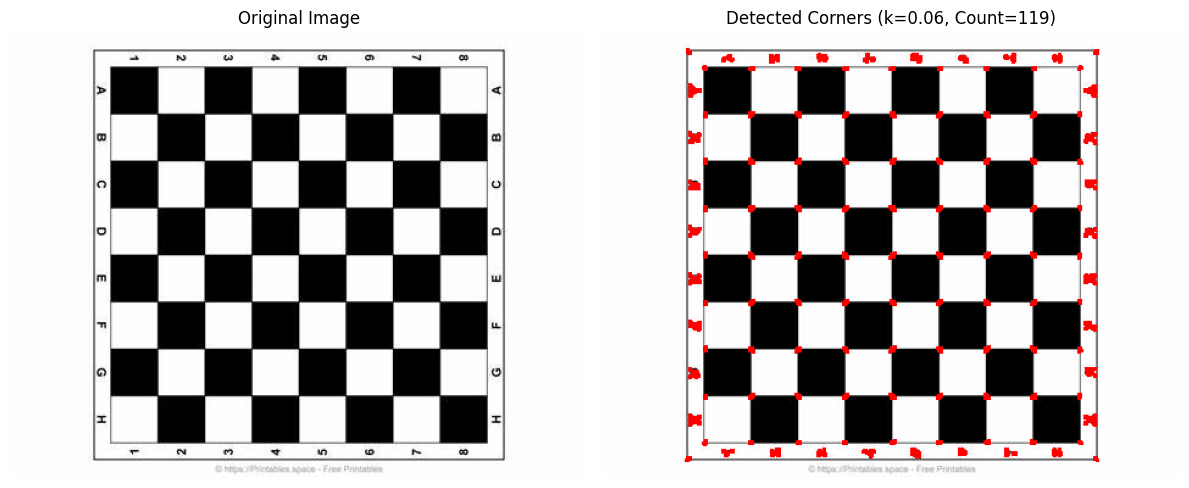

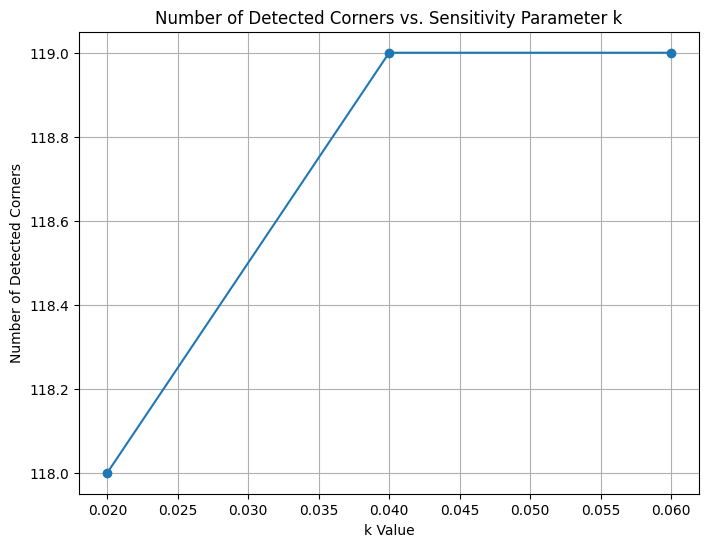

In [39]:
def vary_k_and_detect(image_path, ks, block_size=2, ksize=3, threshold=0.01, output_dir='corner_detection_results'):
    """
    Varies the sensitivity parameter `k`, detects corners for each `k`, and displays the results.

    Parameters:
    - image_path (str): Path to the input image.
    - ks (list of float): List of `k` values to iterate over.
    - block_size (int): Neighborhood size for corner detection.
    - ksize (int): Aperture parameter for the Sobel operator.
    - threshold (float): Threshold for detecting strong corners.
    """
    corner_counts = []
    
    for k in ks:
        print(f"Processing with k={k}...")
        dst, processed_img = detect_corners(image_path, block_size, ksize, k, threshold)
        count = count_corners(dst, threshold)
        corner_counts.append((k, count))
        print(f"Number of corners detected: {count}")
        
        # Display the results
        display_corner_detection(image_path, processed_img, k, count)
    
    # Plot the number of detected corners vs k
    ks_values = [item[0] for item in corner_counts]
    counts = [item[1] for item in corner_counts]
    
    plt.figure(figsize=(8, 6))
    plt.plot(ks_values, counts, marker='o')
    plt.title('Number of Detected Corners vs. Sensitivity Parameter k')
    plt.xlabel('k Value')
    plt.ylabel('Number of Detected Corners')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Define the path to the input image
    image_path = 'images/chessboard.jpeg'
    
    # Define the range of k values to test
    ks = [0.02, 0.04, 0.06]
    
    # Perform corner detection with varying k values
    vary_k_and_detect(image_path, ks)


#### Explanation:

Increasing the `k` value makes the corner detection algorithm more stringent, detecting only the most prominent corners. Conversely, decreasing `k` allows the detection of more corners, including weaker and potentially noisy ones. Balancing `k` is crucial for accurately identifying meaningful corners without introducing excessive noise.

---



## Task 5: Short Theory (10 Marks)

### How the Hough Transform Differs When Detecting Lines Versus Circles

**Hough Transform for Lines vs. Circles**

The Hough Transform is a feature extraction technique used to detect geometric shapes in images. While it fundamentally operates on the principle of mapping points to a parameter space, its application differs based on the shape being detected.

**Line Detection:**
- **Parameter Space:** For line detection, the Hough Transform uses a two-parameter space, typically \( \rho \) and \( \theta \), where \( \rho \) represents the distance from the origin to the closest point on the line, and \( \theta \) is the angle of the line.
- **Computational Complexity:** Relatively lower, as only two parameters need to be computed and accumulated.
- **Usage Scenario:** Effective for detecting straight edges such as building outlines or road markings.

**Circle Detection:**
- **Parameter Space:** For circles, the Hough Transform requires a three-parameter space: the center coordinates \( (a, b) \) and the radius \( r \).
- **Computational Complexity:** Higher, since an additional dimension (radius) is involved, increasing the computational load and memory requirements.
- **Usage Scenario:** Suitable for identifying round objects like coins, wheels, or circular signs.

**Comparative Analysis:**
- **Dimension of Parameter Space:** Line detection uses a 2D parameter space, while circle detection operates in a 3D space, making circle detection more computationally intensive.
- **Resolution and Accuracy:** Detecting circles demands more precise parameter tuning (especially radius) to accurately identify varying sizes, whereas lines primarily depend on orientation and position.
- **Application Flexibility:** Line detection is often faster and suitable for real-time applications, whereas circle detection is more specialized and used when circular features are of interest.

In summary, while the foundational concept of mapping image points to a parameter space remains consistent, the Hough Transform's implementation varies significantly between line and circle detection in terms of parameter dimensionality and computational demands.


